# <center>Лекція 2. Візуальний аналіз даних


Імпортуємо всі необхідні бібліотеки і дещо налаштуємо відображення зображень.

In [3]:
# будемо відображати графіки прямо в jupyter'і
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графіки в svg виглядають більш чіткими
%config InlineBackend.figure_format = 'svg' 

#збільшимо дефолтний розмір графіків
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd

Після цього завантажимо в `dataframe` дані, з якими будемо працювати. Для прикладів візуалізації виберемо дані про продажіі оцінки відео-ігр з  [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). Дані про оцінки ігр є не для всіх рядків, тому відразу залишаємо тільки ті записи, за якими є повні дані.

In [2]:
df = pd.read_csv('data/video_games_sales.csv').dropna()
print(df.shape)

(6825, 16)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [5]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

Всього в таблиці 6825 об'єктів і 16 ознак для них. Подивимося на декілька перших записів за допомогою методу head, щоб впевнитися, що все було розпарсино правильно. Для зручності залишаємо тільки ті ознаки, які ми будемо в подальшому використовувати.

In [6]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

Name Platform  Year_of_Release     Genre  Global_Sales  \
0             Wii Sports      Wii             2006    Sports         82.53   
2         Mario Kart Wii      Wii             2008    Racing         35.52   
3      Wii Sports Resort      Wii             2009    Sports         32.77   
6  New Super Mario Bros.       DS             2006  Platform         29.80   
7               Wii Play      Wii             2006      Misc         28.92   

   Critic_Score  Critic_Count  User_Score  User_Count Rating  
0          76.0            51         8.0         322      E  
2          82.0            73         8.3         709      E  
3          80.0            73         8.0         192      E  
6          89.0            65         8.5         431      E  
7          58.0            41         6.6         129      E

Перш ніж ми перейдемо до розгляду методів бібліотек seaborn і plotly, обговоримо найбільш простий і як правило зручний спосіб візуалізації даних з pandas dataframe — це використання функції plot.
Для прикладу побудуємо графік продаж відео ігр в різноманітних країнах в залежності від року. Для початку відфілтруємо тільки потрібні нам стовбці, потім підрахуємо сумарні продажі по рокам і в отриманого dataframe викличичимо функцію plot без параметрів. 

Реалізуємо функції plot в pandas заснована на використанні бібліотеки matplotlib. 

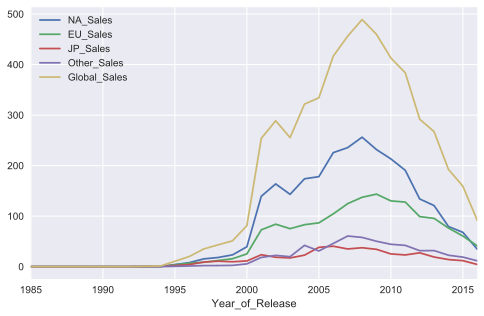

In [6]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot();

За допомогою параметра kind можна змінити тип графіка, наприклад, на bar chart. Matplotlib дозволяє дуже гнучко налаштовувати графіки. На графіку можна змінити майже все, що завгодно, але потрібно поритися в документації і знайти потрібні параметри. Наприклад, параметр rot відповідає за кут нахилу підписів до осей x.

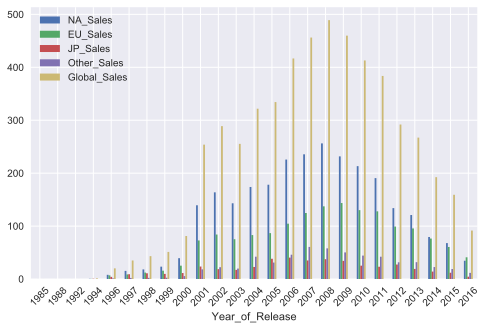

In [7]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45);

## Seaborn

Тепер давайте перейдемо до бібліотеки seaborn. Seaborn — це по суті більш високорівневе API на базі бібліотеки matplotlib. Seaborn містить більш адекватні дефолтні настройки оформлення графіків. Також в бібліотеці є достатньо складні типи візуалізації, які в matplotlib потребували б більшої кількості коду.

Познайомтесь з першим таким "складним" типом графіків pair plot (scatter plot matrix). Ця візуалізація допоможе нам подивитися на одному рисунку, як пов'язані між собою різні ознаки. 

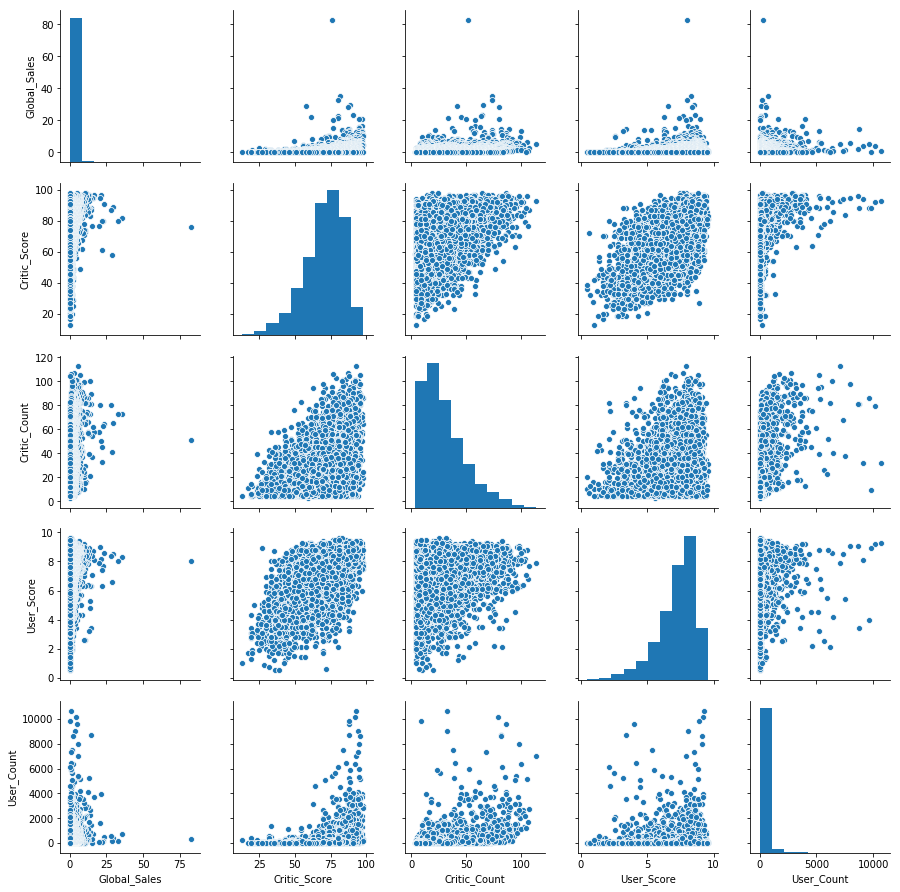

In [11]:
# c svg pairplot браузер працює сповільнено
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 
                 'User_Score', 'User_Count']]);

Також за допомогою `seaborn` можна побудувати розподіл. Для прикладу подивимося на розподіл оцінок критиків `Critic_Score`. Для цього побудуємо __`distplot`__. За замовчуванням на графіку відображається гістограма і [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

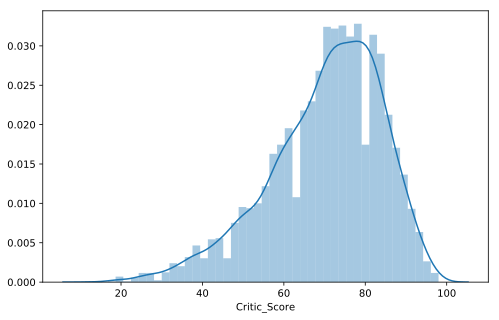

In [9]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(df.Critic_Score);

Для того щоб детальніше подивитися на взаємозвязок двох числових ознак, є ще і __`joint_plot`__ – це гібрид `scatter plot` і `histogram` (відображаються також гістограми розподілів ознак). Подивимося на те, як пов'язані між собою оцінки критиків `Critic_Score` і оцінки користувача `User_Score`.

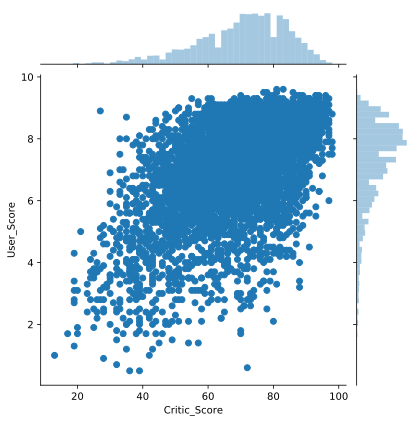

In [10]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter');

Ще один корисний тип графіків – це __`box plot`__. Давайте порівняємо користувацькі оцінки ігр для топ-5 найбільших ігрових платформ.

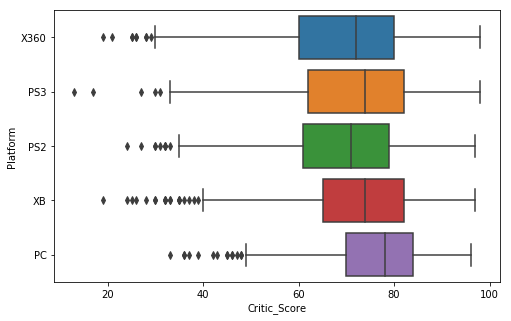

In [12]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", 
            data=df[df.Platform.isin(top_platforms)], orient="h");

Думаю, варто обговорити дещо детальніше, як розуміти `box plot`. `Box plot` складається з коробки (тому він і називається `box plot`), вусиків і точок. Коробка показує інтерквантильний розмах розподілу, тобто відповідно 25% (`Q1`) і 75% (`Q3`) процентілі. Риска всередині коробки позначає медіану розподілу. 
З коробкою розібралися, перейдемо до вус. Вуса відображають весь разкид точок крім викидів, тобто є мінімальні і максимальні значення, які потрапляють в проміжок `(Q1 - 1.5*IQR, Q3 + 1.5*IQR)`, де `IQR = Q3 - Q1` - інтерквантильний розмах. Точками на графіку позначаються викиди (`outliers`) - ті значення, які не вписуються в проміжок значень, заданий вусами графіка.


І ще один тип графіків (останній з тих, які ми розглядаємо в цій статті) - це __`heat map`__. `Heat map` дозволяє подивитися на розподіл якоїсь числової ознаки за двома категоріальними. Візуалізуємо сумарні продажі ігр за жанрами і ігровим платформам.

In [17]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)

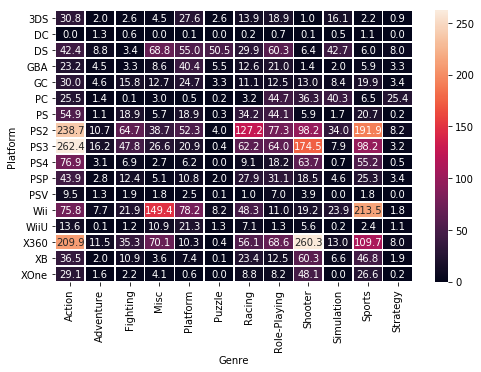

In [18]:
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5);

## Plotly

Ми розглянули візуалізації на базі бібліотеки `matplotlib`. Однак, це не єдина опція для побудови графіків на мові `python`. Познайомтесь також з бібліотекою __`plotly`__. `Plotly` - це open-source бібліотека, яка дозволяє будувати інтерактивні графіки в jupyter.notebook'e без необхідності зариватися в javascript код. 

Краса інтерактивних графіків полягає в тому, що можна подивитися точне числове значення при наведенні мишки, приховати нецікаві ряди у візуалізації, наблизити задану ділянку графіка і т.д.

Перед початком роботи імпортуємо всі необхідні модулі і ініціалізуємо `plotly` за допомогою команди `init_notebook_mode`.

In [20]:
!pip install plotly

  Running setup.py bdist_wheel for retrying: started
  Running setup.py bdist_wheel for retrying: finished with status 'done'
  Stored in directory: C:\Users\syste\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [21]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Для початку побудуємо __`line plot`__ з динамікою кількості створюваних ігр і їх продажі за роками. 

In [22]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count())
years_df.columns = ['Global_Sales', 'Number_of_Games']

В `plotly` будується візуалізація об'єкта `Figure`, який складається з даних (масив ліній, які в бібліотеці називаються `traces`) і оформлення/стилю, за який відповідає об'єкт `layout`. В простих випадках можна викликати функцію `iplot` і просто від масиву `traces`.

In [23]:
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Також можна відразу зберегти графік у вигляді html-файлу.

In [28]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False);

Подивимося також на ринкову долю ігрових платформ, розраховану за кількістю випущених ігр і за сумарним прибутком. Для цього побудуємо __`bar chart`__.

In [27]:
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

In [29]:
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

data = [trace0, trace1]
layout = {'title': 'Share of platforms'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

В `plotly` можна побудувати і __`box plot`__. Розглянемо різноманіття оцінок критиків в залежності від жанру гри.

In [30]:
data = []

for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )
iplot(data, show_link = False)

In [35]:
Зчитуємо в `DataFrame` з даних про відтік клієнтів телеком-оператора. 

In [36]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

In [37]:
df = pd.read_csv('data/telecom_churn.csv')

In [39]:
Перевіримо, чи все зчиталося корректно – подивимося на перші 5 рядків (метод `head`).

In [40]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [ ]:
Число строк (клиентов) и столбцов (признаков):

In [41]:
df.shape

(3333, 20)

In [ ]:
Подивимося на ознаки і впевнимося, що пропусків ні в одному з них немає – скрізь по 3333 записи.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [44]:
Подивимося на розподіл цільового класу – віддтоку клієнтів.

In [45]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

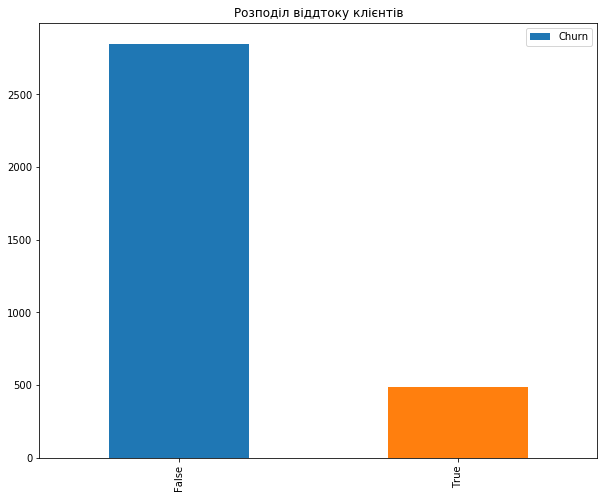

In [46]:
df['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Розподіл віддтоку клієнтів');

In [ ]:
Виділимо наступні групи ознак (серед всіх крім Churn ):
бінарні: International plan, Voice mail plan
категоріальні: State
порядкові: Customer service calls
кількісні: всі решта

Подивимося на кореляції кількісних ознак. 
За розфарбованою матрицею кореляцій видно, що такі ознаки як Total day 
charge рахуються за проговореним хвилинам (Total day minutes). 
Тобто 4 ознаки можна викинути, вони не несуть корисної інформації.

In [49]:
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr()

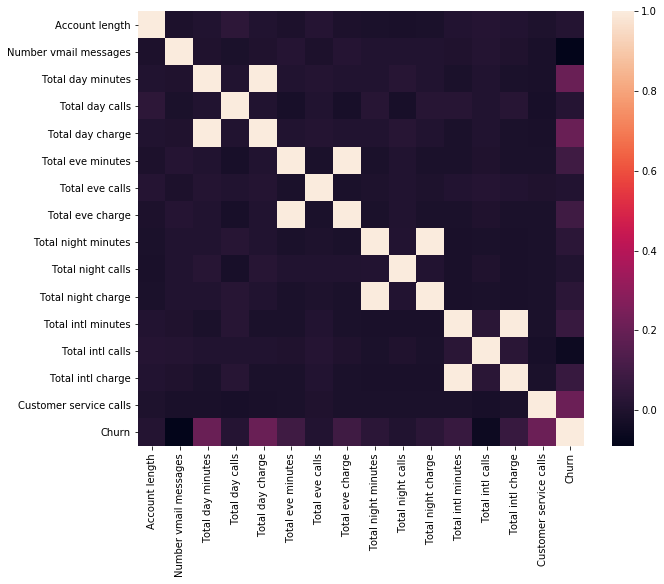

In [50]:
sns.heatmap(corr_matrix);

In [ ]:
Тепер подивимося на розподіл всіх цікавих нам кількісних ознак. 
На бінарні/категоріальні/порядкові ознаки будемо дивитися окремо.

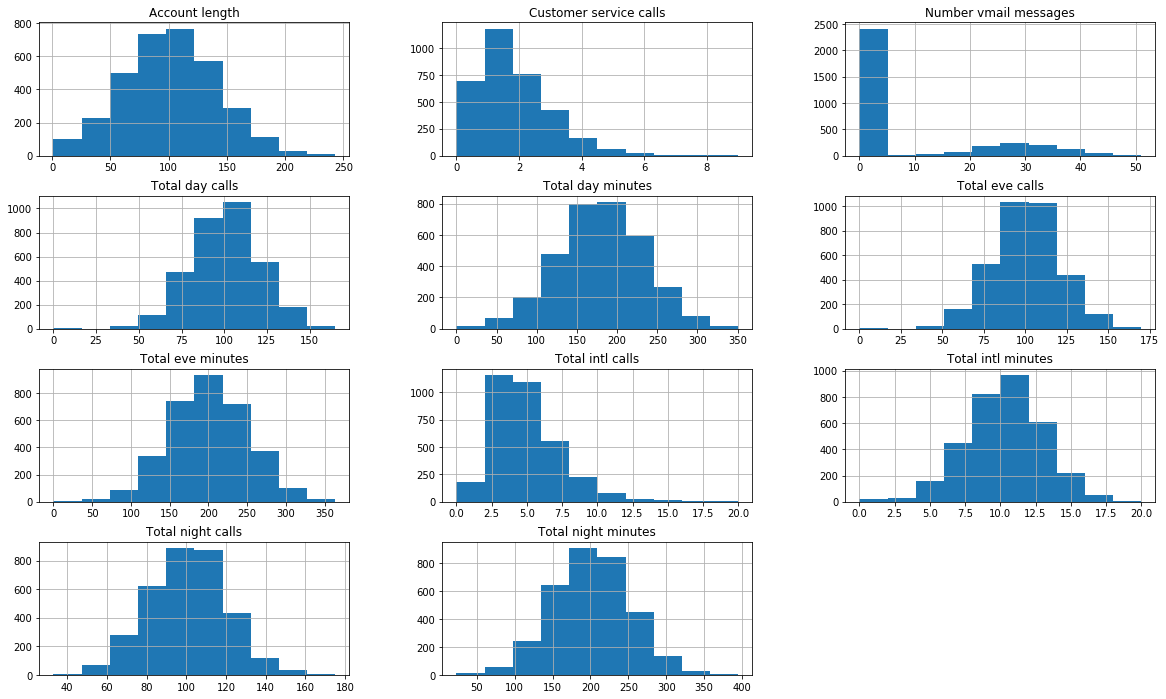

In [51]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

df[features].hist(figsize=(20,12));

In [ ]:
Бачимо, що більшість ознак розподілені нормально. 
Винятки - число дзвінків в сервісний центр (Customer service calls) 
(тут більше підходить пуассоновским розподіл) і число голосових повідомлень 
(Number vmail messages, пік в нулі, тобто це ті, у кого голосова пошта не підключена). 
Також зміщене розподіл числа міжнародних дзвінків (Total intl calls).

Ще корисно будувати ось такі картинки, де на головній діагоналі малюються розподілу ознак, 
а поза головною діагоналі - діаграми розсіювання для пар ознак. Буває, що це призводить 
до якихось висновків, але в даному випадку все приблизно зрозуміло, без сюрпризів.

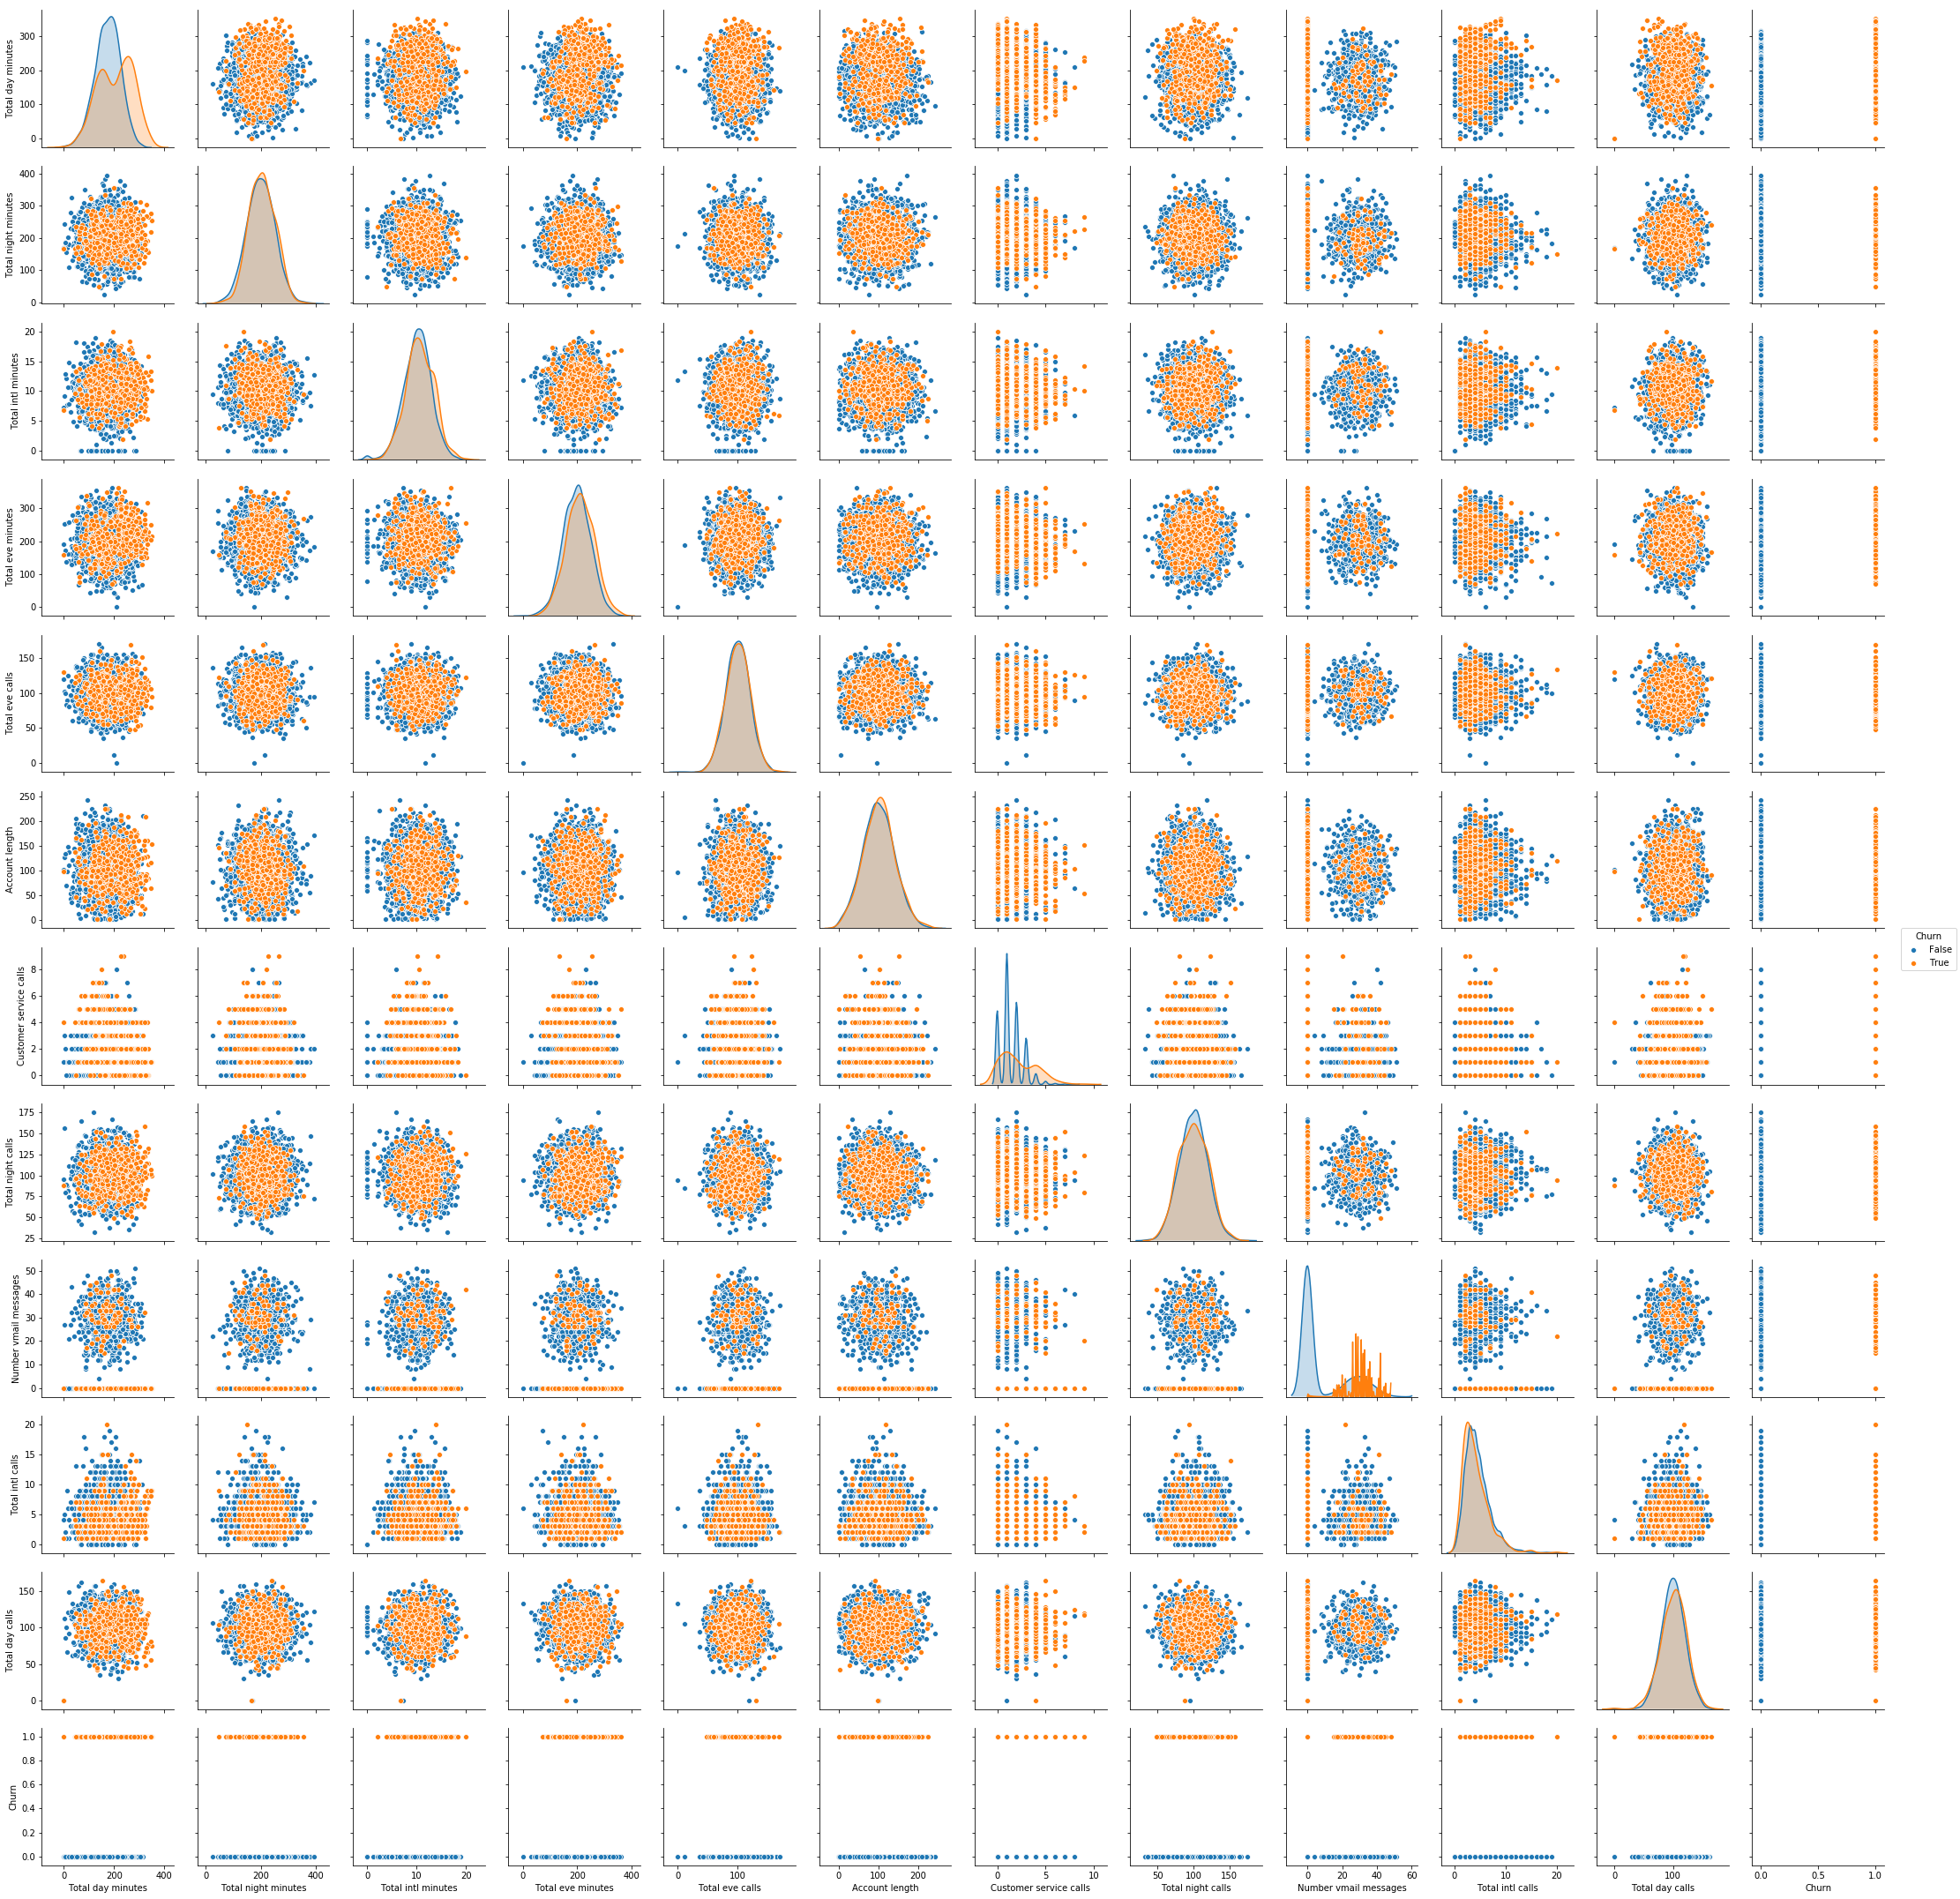

In [52]:
sns.pairplot(df[features + ['Churn']], hue='Churn');

In [ ]:
Далі подивимося, як ознаки пов'язані з цільовим - з відтоком.

Побудуємо boxplot-и, яке описує статистики розподілу кількісних ознак в двох групах: серед лояльних і пішли клієнтів.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


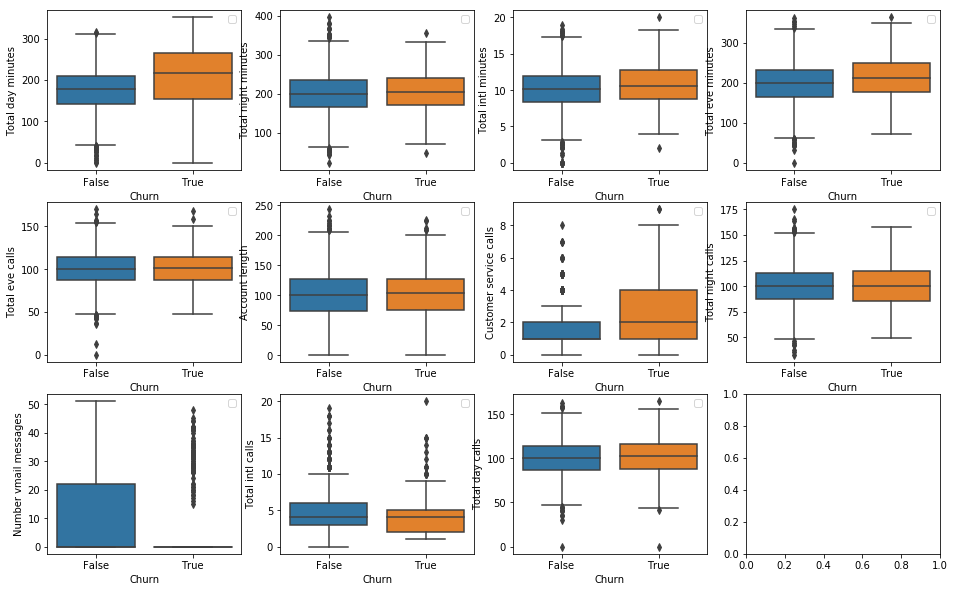

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=df, ax=axes[int(idx / 4), idx % 4])
    axes[int(idx / 4), idx % 4].legend()
    axes[int(idx / 4), idx % 4].set_xlabel('Churn')
    axes[int(idx / 4), idx % 4].set_ylabel(feat);

In [ ]:
На око найбільша відмінність ми бачимо для ознак Total day minutes, 
Customer service calls і Number vmail messages. Згодом ми навчимося 
визначати важливість ознак в завданні класифікації за допомогою випадкового 
лісу (або градієнтного бустінга), і виявиться, що перші два - 
дійсно дуже важливі ознаки для прогнозування відтоку.

Подивимося окремо на картинки з розподілом кол-ва обговорені днем ​​хвилин серед лояльних / пішли. 
Зліва - знайомі нам боксплоти, праворуч - згладжені гістограми розподілу числового ознаки 
в двох групах (швидше за просто красива картинка, все і так зрозуміло по боксплоту).
Цікаве спостереження: в середньому пішли клієнти більше користуються зв'язком. 
    Можливо, вони незадоволені тарифами, і одним із заходів боротьби з відтоком 
    буде зниження тарифних ставок (вартості мобільного зв'язку). Але це вже компанії 
                                   треба буде проводити додатковий економічний аналіз, 
                                   чи дійсно такі заходи будуть виправдані.

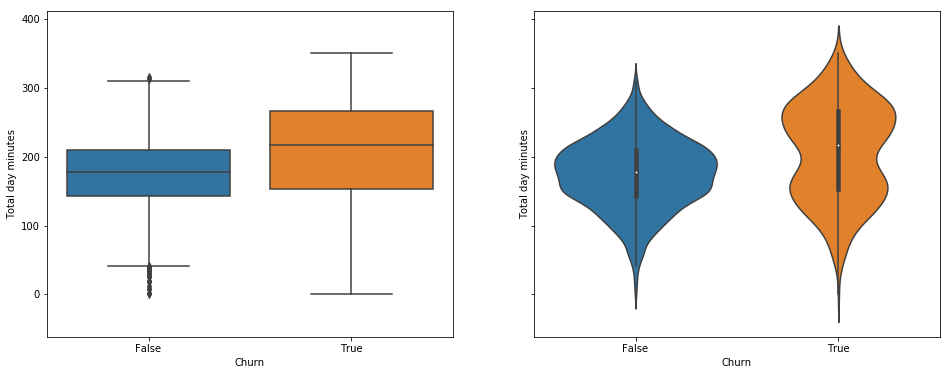

In [54]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

In [ ]:
Тепер зобразимо розподіл числа звернень в сервісний центр (таку картинку ми будували в першій статті). 
Тут унікальних значень ознаки не багато (ознака можна вважати як кількісним цілочисельним, так і порядковим), 
і наочніше зобразити розподіл за допомогою countplot. 
Спостереження: частка відтоку сильно зростає починаючи з 4 дзвінків в сервісний центр.

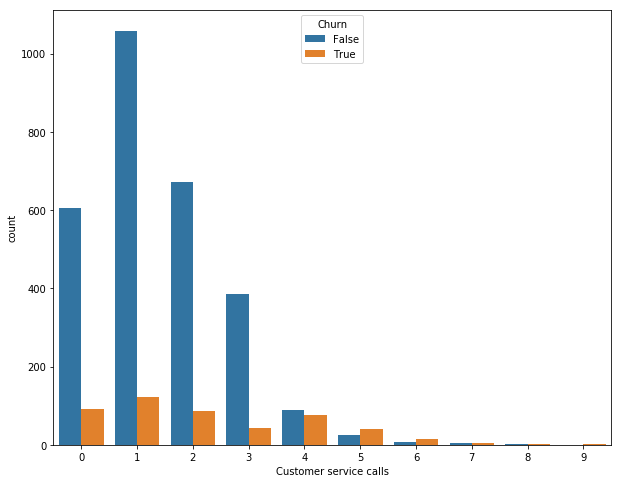

In [55]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);


In [ ]:
Тепер подивимося на зв'язок бінарних ознак International plan і Voice mail plan з відтоком. 
Спостереження: коли роумінг підключений, частка відтоку набагато вище, тобто наявність междунароного 
    роумінгу - сильний ознака. 
Про голосову пошту такого не можна сказати.

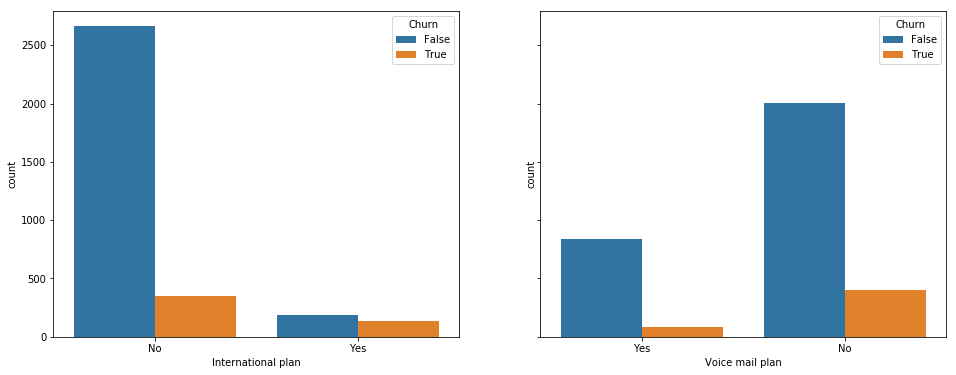

In [56]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

In [ ]:
Нарешті, подивимося, як з відтоком пов'язаний категоріальний ознака State. 
З ним вже не так приємно працювати, оскільки число унікальних штатів досить велике - 51. 
Можна на початку побудувати зведену табличку або порахувати відсоток відтоку для кожного штату. 
Але ми бачимо, що даних по кожному штату окремо замало (пішли - всього від 3 до 17), 
тому, можливо, ознака State згодом не варто додавати в моделі класифікації 
через ризик перенавчання (але ми це будемо перевіряти на крос-валідації , 
stay tuned!).

In [57]:
pd.crosstab(df['State'], df['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  \
Churn                                                                           
False  49  72  44  60  25  57  62  49  52  55  46  50  41  64  53  62  57  51   
True    3   8  11   4   9   9  12   5   9   8   8   3   3   9   5   9  13   8   

State  LA  MA  MD  ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  \
Churn                                                                           
False  47  54  53  49  57  69  56  51  54  57  56  56  47  50  56  52  68  68   
True    4  11  17  13  16  15   7  14  14  11   6   5   9  18   6  14  15  10   

State  OK  OR  PA  RI  SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY  
Churn                                                              
False  52  67  37  59  46  52  48  54  62  72  65  52  71  96  68  
True    9  11   8   6  14   8   5  18  10   5   8  14   7  10   9

In [59]:
Долі відтоку для кожного штату:

In [ ]:
Видно, що в Нью-Джерсі і Каліфорнії частка відтоку вище 25%, а на Гаваях і в Алясці менше 5%. 
Але ці висновки побудовані на занадто скромною статистикою і можливо, це просто особливості наявних 
даних (тут можна і гіпотези попроверять про кореляції 
Метьюса і Крамера, але це вже за рамками цієї статті).

Нарешті побудуємо t-SNE уявлення даних. Назва методу складне - t-distributed Stohastic Neighbor 
Embedding, математика теж крута (і виникають в неї не будемо), але основна ідея проста, як двері: 
    знайдемо таке відображення з багатовимірного простору ознак на площину (або в 3D, але майже 
                                                                            завжди вибирають 2D ), 
    щоб точки, які були далеко один від одного, на площині теж виявилися віддаленими, а близькі точки - 
    також відобразилися на близькі. Тобто neighbor embedding - це свого роду пошук нового представлення даних, 
    при якому зберігається сусідство.
Трохи деталей: викинемо штати і ознака відтоку, бінарні Yes / 
    No-ознаки переведемо в числа (за допомогою pandas.Series.map). 
    Також потрібно масштабувати вибірку - з кожної ознаки відняти його середнє 
    і поділити на стандартне відхилення, це робить StandardScaler.

In [60]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [61]:
# перетворюємо всі ознаки в числові, відкинувши штати
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

Wall time: 1min 25s


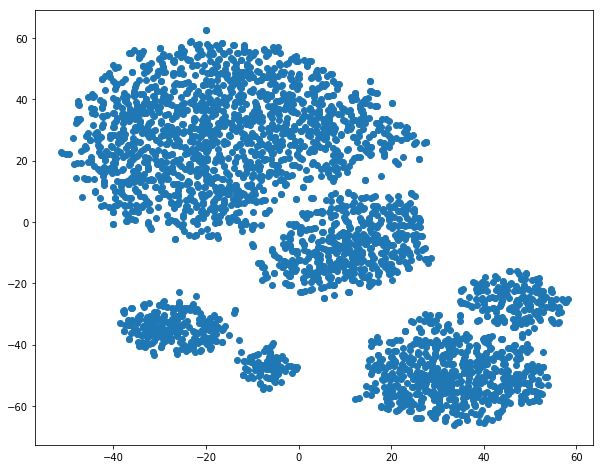

In [63]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

In [ ]:
Розфарбуємо отримане t-SNE уявлення даних по відтоку (сині - лояльні, помаранчеві - пішли клієнти).

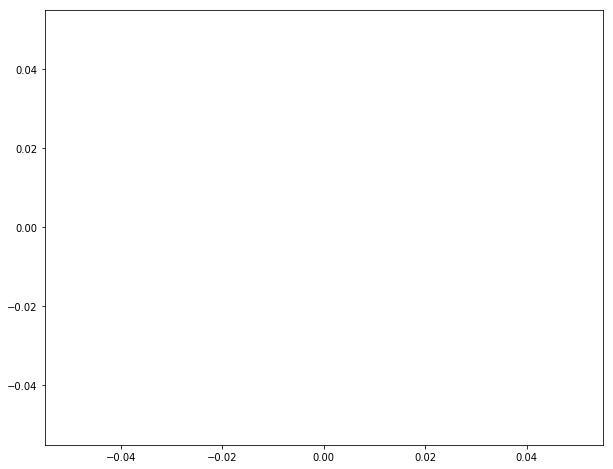

In [65]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Churn'].map({0: 'blue', 1: 'orange'}));

In [ ]:
Бачимо, що пішли клієнти переважно "кучкуються" в деяких областях простору ознак.

In [ ]:
Наостанок зазначимо мінуси t-SNE (так, у ній теж краще писати окрему статтю):
велика обчислювальна складність. Ось ця реалізація sklearn швидше за все не допоможе у 
Вашій реальній задачі, на вибірках побільше варто подивитися в бік Multicore-TSNE;
картинка може сильно змінитися при зміні random seed, це ускладнює інтерпретацію. 
Ось хороший тьюториал по t-SNE. Але в цілому по таким картинкам не варто робити 
далекосяжних висновків - не варто гадати по кавовій гущі. 
Іноді щось кидається в очі і підтверджується при вивченні, але це не часто відбувається.